In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython

# Playing around in the frequency domain of two audio samples taken from OralB and Sonicare Electric Toothbrushes

## Playback the two audio files

In [2]:
IPython.display.Audio('/Users/isaacberez/Documents/Python/toothbrush_fft/OralB.wav')

In [3]:
IPython.display.Audio('/Users/isaacberez/Documents/Python/toothbrush_fft/Sonicare.wav')

## Load in the audio files with scipy's 'wavfile' reader

In [4]:
samplerate_ob,data_ob = wavfile.read('/Users/isaacberez/Documents/Python/toothbrush_fft/OralB.wav')

In [5]:
samplerate_ob

48000

In [6]:
data_ob

array([[       0,        0],
       [     768,      768],
       [  -48640,   -48640],
       ...,
       [  496896,  -602112],
       [ 1998336, -2062592],
       [  642560,  -642560]], dtype=int32)

## Create Dataframes of data for better organization

In [7]:
data_ob_df = pd.DataFrame(data_ob, columns = ['channel 0', 'channel 1'])

In [8]:
data_ob_df

channel 0  channel 1
0               0          0
1             768        768
2          -48640     -48640
3          -61440     -61440
4          -68864     -68864
...           ...        ...
224763    1362944   -1566464
224764    -741888     461056
224765     496896    -602112
224766    1998336   -2062592
224767     642560    -642560

[224768 rows x 2 columns]

In [9]:
print ('Oral B audio data has:', 
       data_ob.shape[1], 'channels,',
       data_ob.shape[0], 'samples, &',
       samplerate_ob, 'Hz samplerate.')

Oral B audio data has: 2 channels, 224768 samples, & 48000 Hz samplerate.


In [10]:
samplerate_sc,data_sc = wavfile.read('/Users/isaacberez/Documents/Python/toothbrush_fft/Sonicare.wav')

In [11]:
samplerate_sc

48000

In [12]:
data_sc

array([[       0,        0],
       [  -11776,   -11776],
       [  -41728,   -41728],
       ...,
       [-1687040,  1714176],
       [-1069824,  1102848],
       [ -697600,   697600]], dtype=int32)

In [13]:
data_sc_df = pd.DataFrame(data_sc, columns = ['channel 0', 'channel 1'])

In [14]:
data_sc_df

channel 0  channel 1
0               0          0
1          -11776     -11776
2          -41728     -41728
3          -91136     -91136
4         -150016    -150016
...           ...        ...
259835   -1649664    1718784
259836   -1817600    1881088
259837   -1687040    1714176
259838   -1069824    1102848
259839    -697600     697600

[259840 rows x 2 columns]

In [15]:
print ('Sonicare audio data has:', 
       data_sc.shape[1], 'channels,',
       data_sc.shape[0], 'samples, &',
       samplerate_sc, 'Hz samplerate.')

Sonicare audio data has: 2 channels, 259840 samples, & 48000 Hz samplerate.


## Quicklook at the raw data

<IPython.core.display.Javascript object>


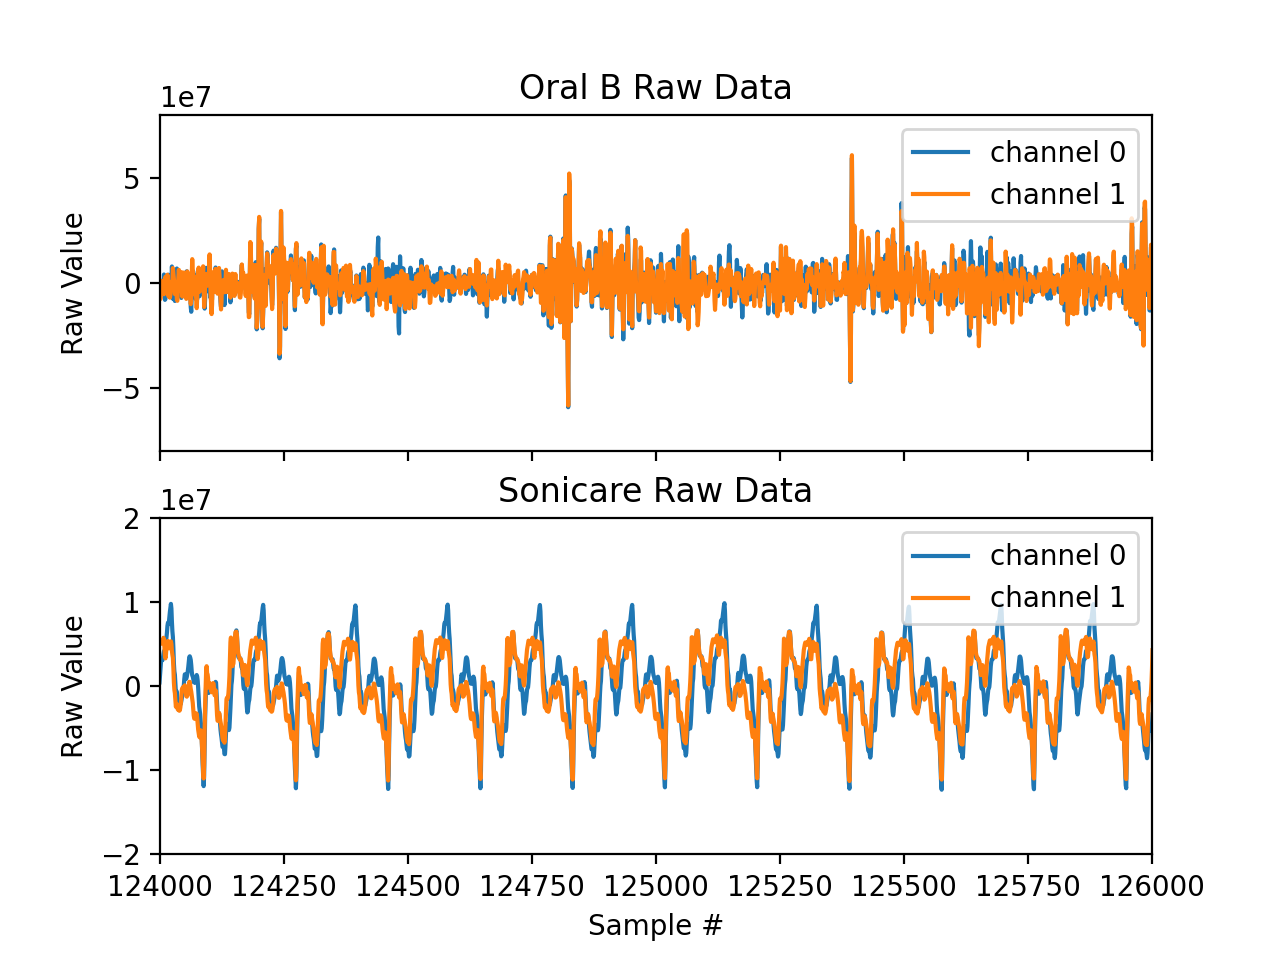

In [68]:
fig,ax = plt.subplots(2,1, sharex = True)
ax[0].set_title('Oral B Raw Data')
ax[0].set_xlim([124000,126000])
ax[0].set_ylim([-8E7,8E7])
ax[0].set_ylabel('Raw Value')
ax[0].plot(data_ob_df['channel 0'], label = 'channel 0')
ax[0].plot(data_ob_df['channel 1'], label = 'channel 1')
ax[0].legend(loc = 'upper right')

ax[1].set_title('Sonicare Raw Data')
ax[1].set_xlim([124000,126000])
ax[1].set_ylim([-2E7,2E7])
ax[1].set_ylabel('Raw Value')
ax[1].set_xlabel('Sample #')
ax[1].plot(data_sc_df['channel 0'], label = 'channel 0')
ax[1].plot(data_sc_df['channel 1'], label = 'channel 1')
ax[1].legend(loc = 'upper right')

plt.show()

## Compute Time Axis given sample rates and total # samples

In [52]:
dt_ob = 1/samplerate_ob
t_ob = np.arange(0,len(data_ob_df)*dt_ob,dt_ob)

dt_sc = 1/samplerate_sc
t_sc = np.arange(0,len(data_sc_df)*dt_sc, dt_sc)

<IPython.core.display.Javascript object>


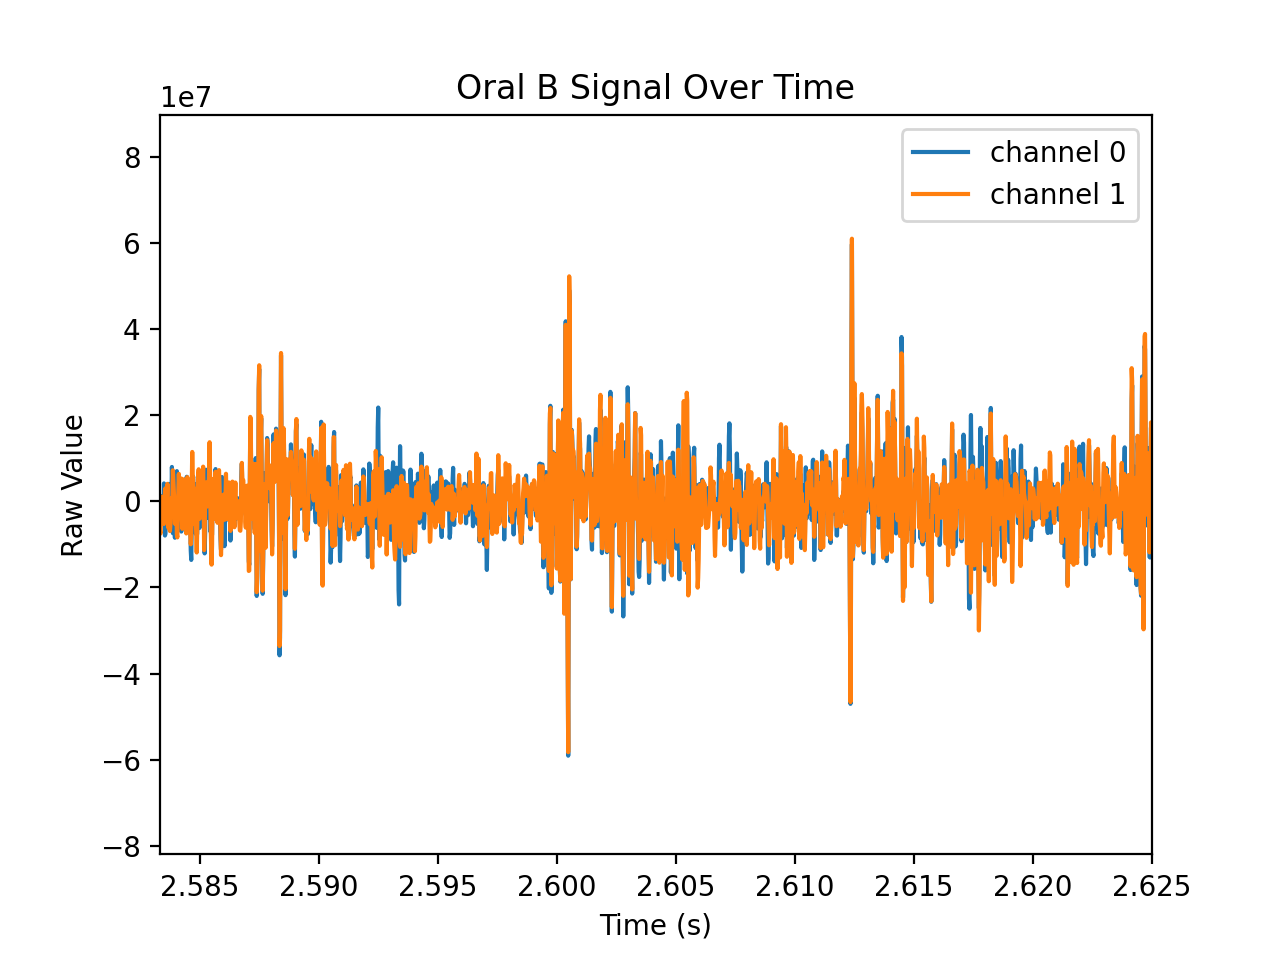

In [66]:
fig2,ax = plt.subplots()
ax.set_title('Oral B Signal Over Time')
ax.set_xlim([t[124000],t[126000]])
#ax.set_ylim([-2E7,2E7])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Raw Value')
ax.plot(t_ob, data_ob_df['channel 0'], label = 'channel 0')
ax.plot(t_ob, data_ob_df['channel 1'], label = 'channel 1')
ax.legend(loc = 'upper right')

plt.show()


## Quick PSD Plotting Using Matlplotlib's built in PSD plotter

<IPython.core.display.Javascript object>


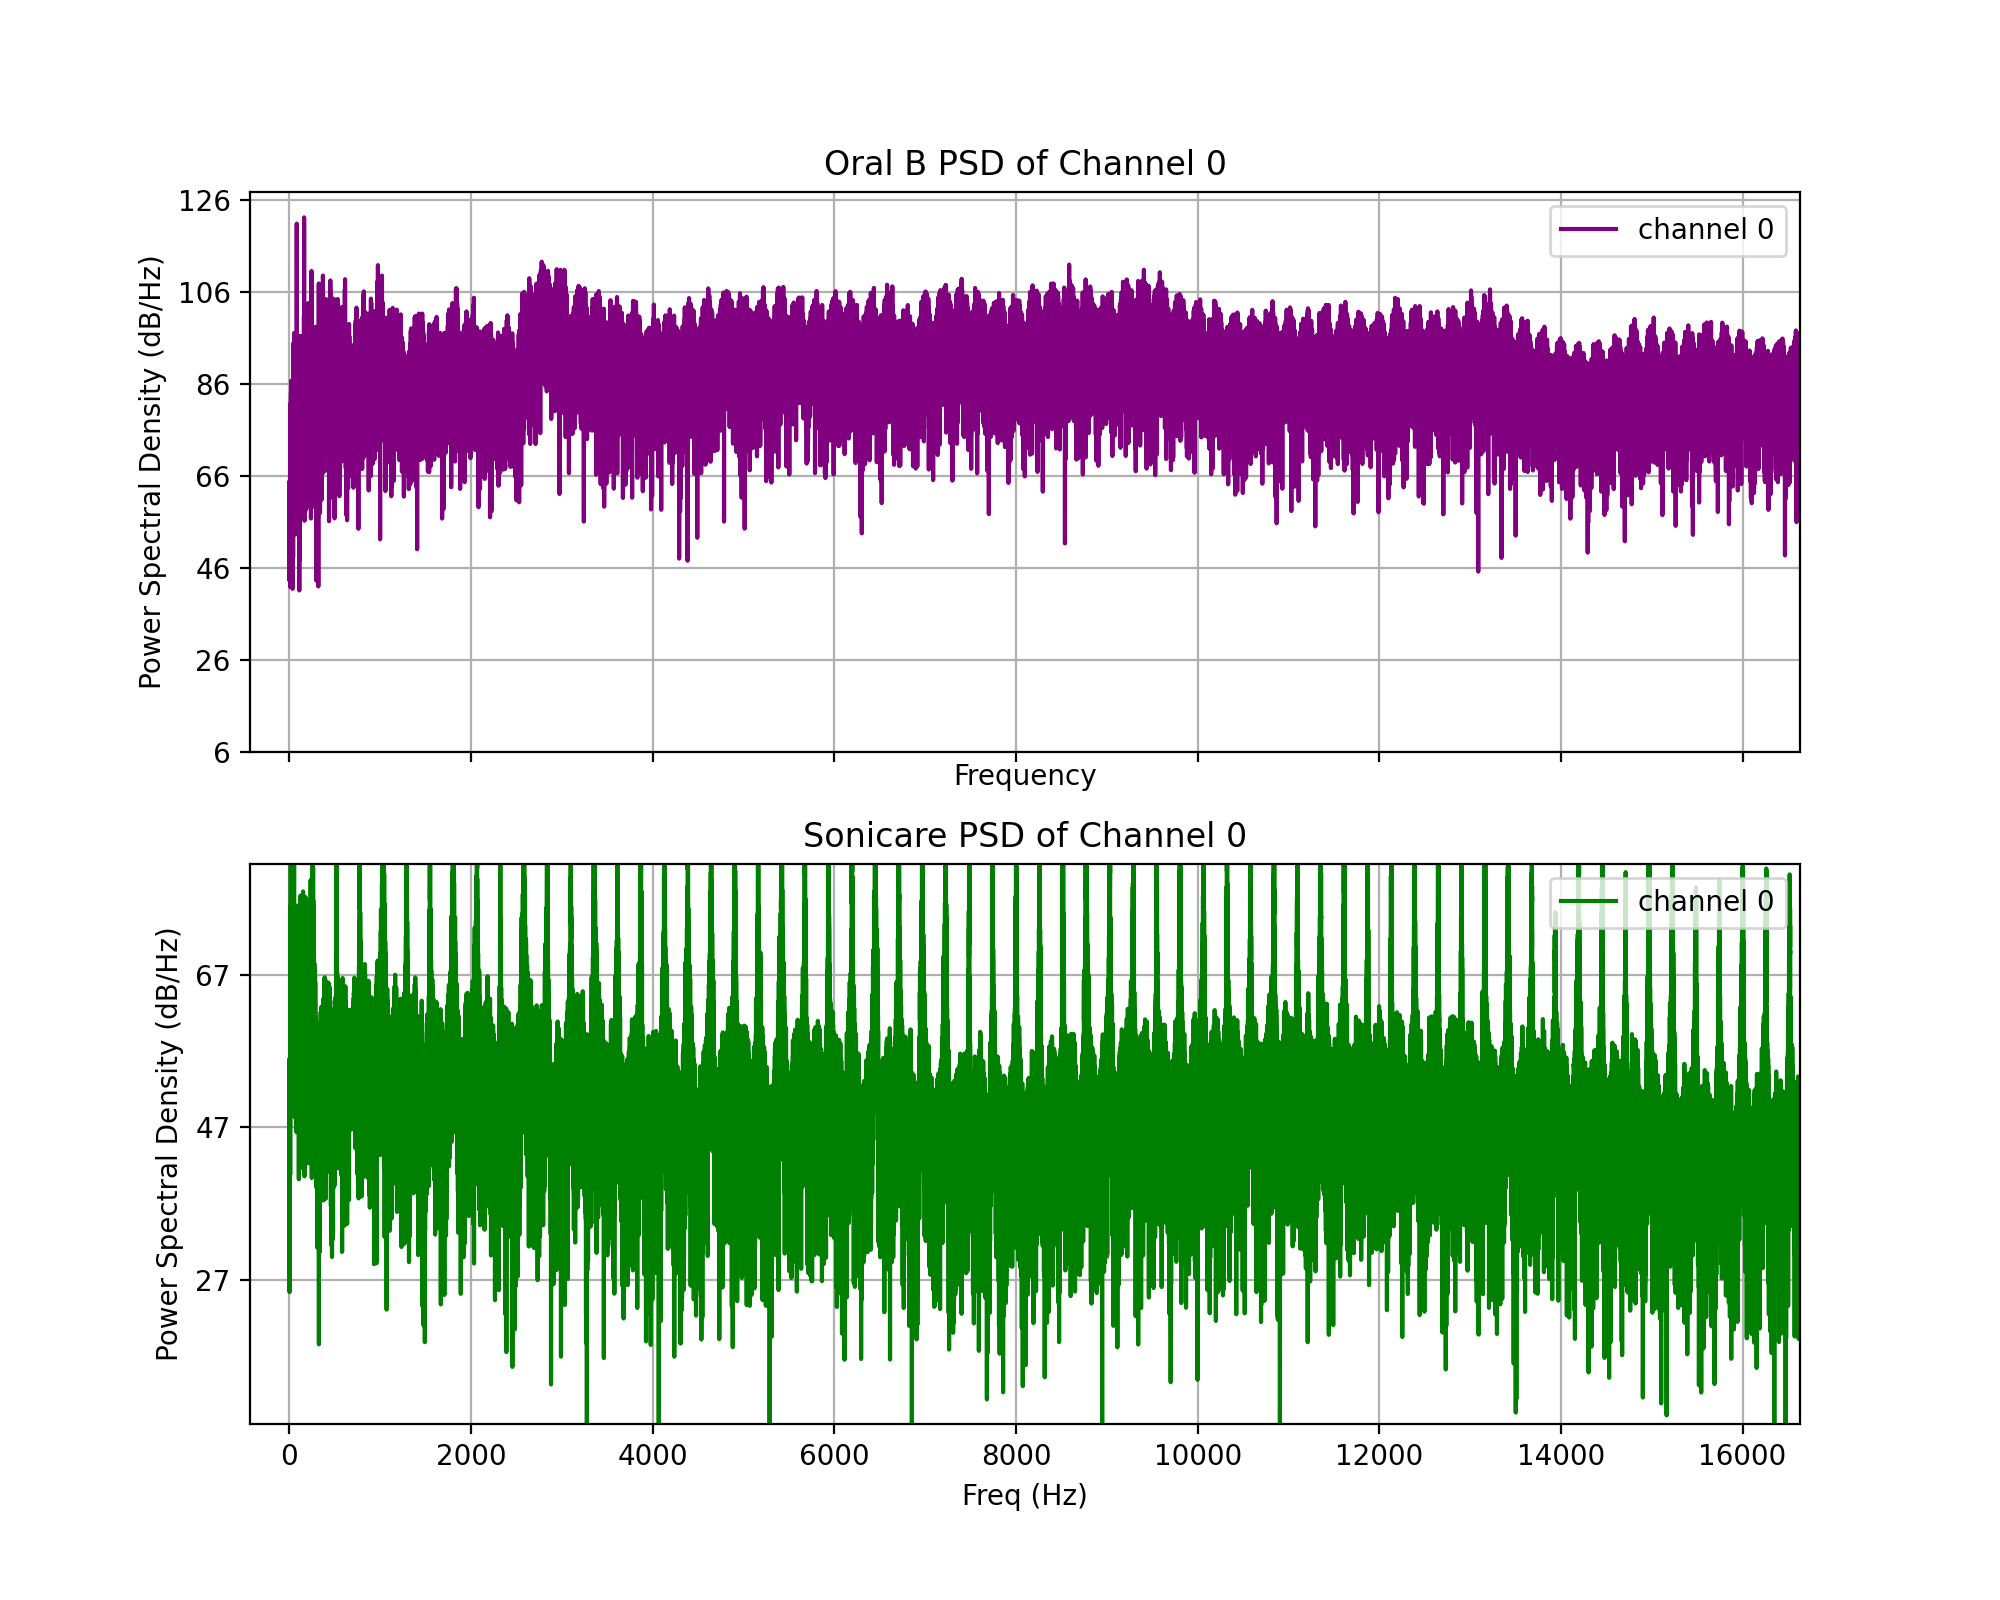

In [63]:
fig,ax = plt.subplots(2,1, sharex = True, figsize = (10,8))
ax[0].set_title('Oral B PSD of Channel 0')
ax[0].psd(data_ob_df['channel 0'],len(t_ob),samplerate_ob, color = 'purple',label = 'channel 0')
ax[0].legend(loc = 'upper right')


ax[1].set_title('Sonicare PSD of Channel 0')
ax[1].psd(data_sc_df['channel 0'],len(t_sc),samplerate_sc, color = 'green',label = 'channel 0')
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('Freq (Hz)')


plt.show()

<IPython.core.display.Javascript object>


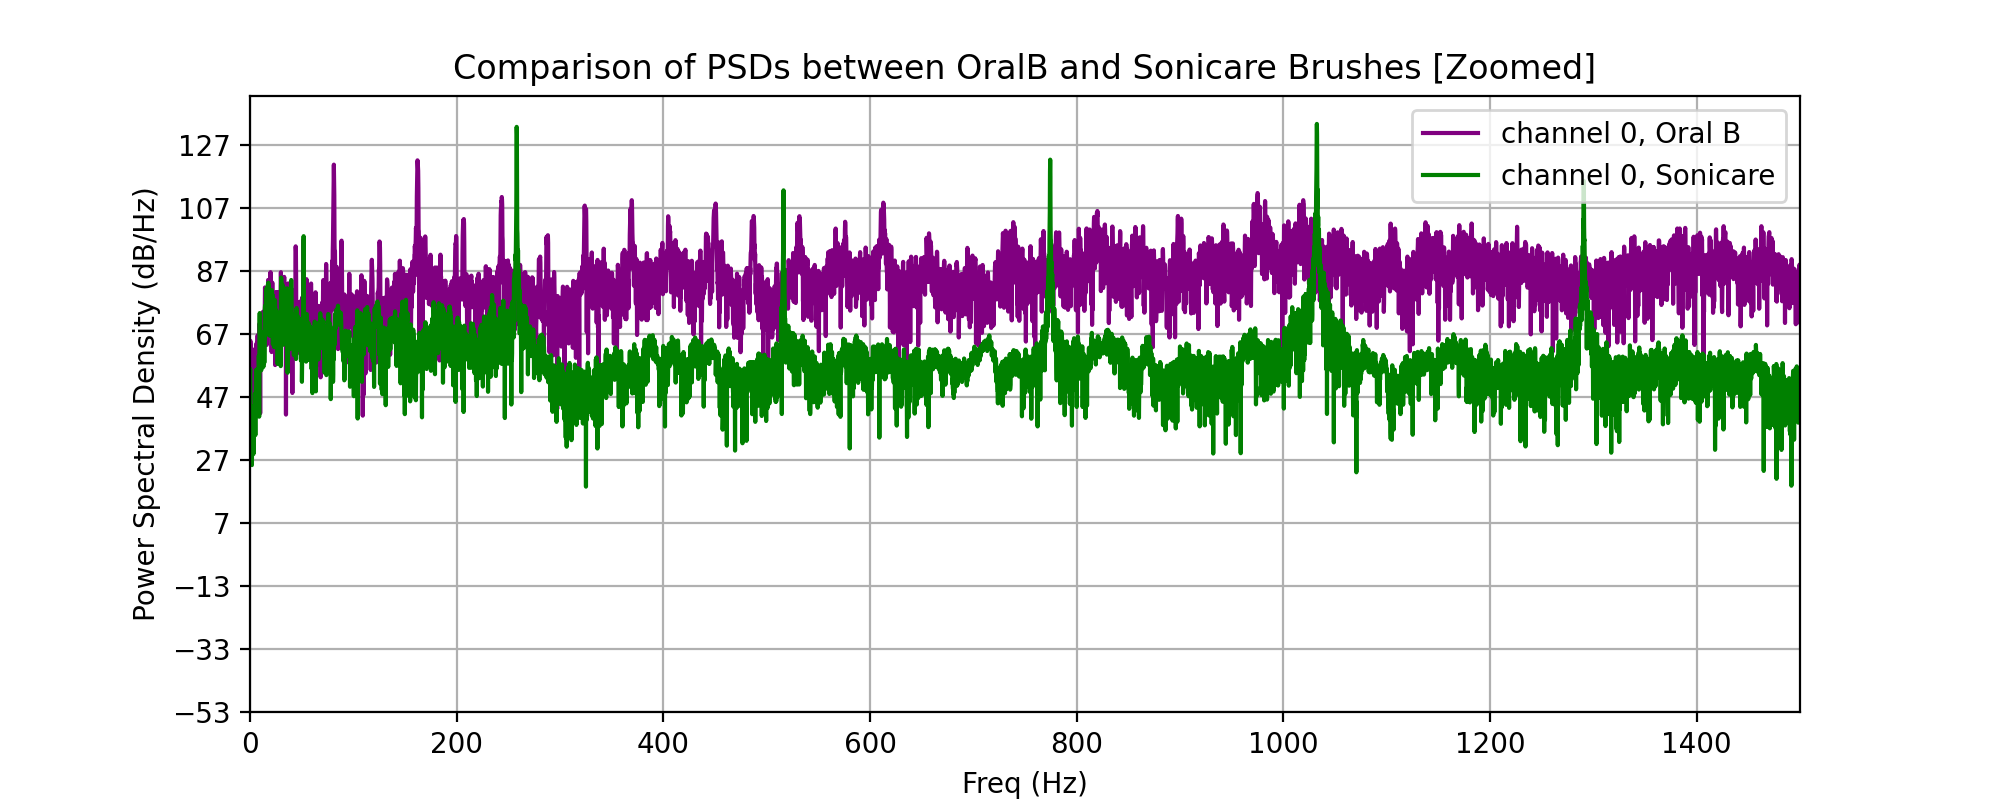

In [173]:
fig,ax = plt.subplots(figsize = (10,4))
ax.set_title('Comparison of PSDs between OralB and Sonicare Brushes [Zoomed]')
ax.psd(data_ob_df['channel 0'],len(t_ob),samplerate_ob, color = 'purple',label = 'channel 0, Oral B')


ax.psd(data_sc_df['channel 0'],len(t_sc),samplerate_sc, color = 'green',label = 'channel 0, Sonicare')

ax.set_xlabel('Freq (Hz)')

ax.legend(loc = 'upper right')
ax.set_xlim([0,1500])
plt.show()

## Extract Power and Frequency Data

In [87]:
power_ob,freqs_ob = plt.psd(data_ob_df['channel 0'],len(t_ob),samplerate_ob)
power_sc,freqs_sc = plt.psd(data_sc_df['channel 0'],len(t_sc),samplerate_sc)

### According to the matplotlib psd documentation, the power is plotted as 10*log10(P). Let's see what the PSD looks like without this scaling...

In [88]:
plotted_power_ob = 10*np.log10(power_ob)
plotted_power_sc = 10*np.log10(power_sc)

<IPython.core.display.Javascript object>


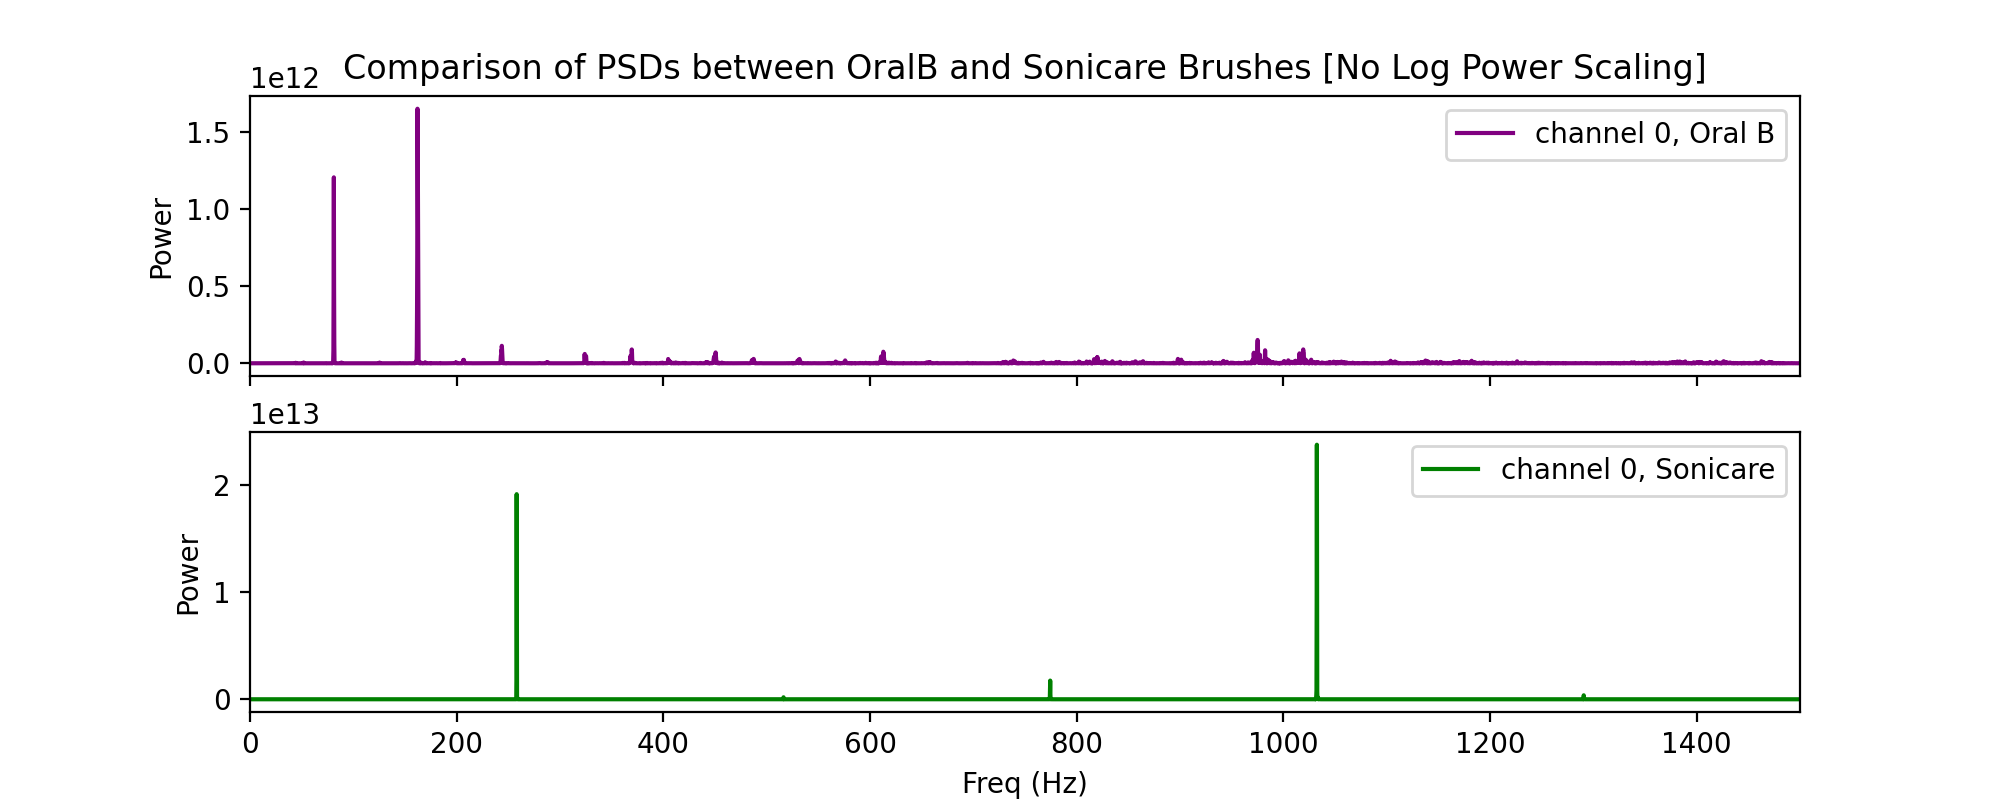

In [178]:
fig,ax = plt.subplots(2,1,sharex = True,figsize = (10,4))
ax[0].set_title('Comparison of PSDs between OralB and Sonicare Brushes [No Log Power Scaling]')
ax[0].plot(freqs_ob,power_ob, color = 'purple',label = 'channel 0, Oral B')
ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('Power')

ax[1].plot(freqs_sc,power_sc, color = 'green',label = 'channel 0, Sonicare')
ax[1].legend(loc = 'upper right')
ax[1].set_ylabel('Power')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_xlim([0,1500])


plt.show()

### Much easier to see the dominant frequencies!

### Get indices of dominant powers for both brushes

In [175]:
indices_ob = np.where(power_ob>0.5E12) 
indices_sc = np.where(power_sc>1E13)

## Use Indices of dominant freqs to zero out small fourier coefficients

In [181]:
f_hat_ob_ch0 = np.fft.fft(data_ob_df['channel 0'],len(t_ob))
f_hat_sc_ch0 = np.fft.fft(data_sc_df['channel 0'],len(t_sc))


In [182]:
f_hat_filtered_ob_ch0 = [0 if f not in f_hat_ob_ch0[indices_ob] else f for f in f_hat_ob_ch0]
f_hat_filtered_sc_ch0 = [0 if f not in f_hat_sc_ch0[indices_sc] else f for f in f_hat_sc_ch0]


In [183]:
f_inv_filtered_ob_ch0 = np.fft.ifft(f_hat_filtered_ob_ch0)
f_inv_filtered_sc_ch0 = np.fft.ifft(f_hat_filtered_sc_ch0)


<IPython.core.display.Javascript object>


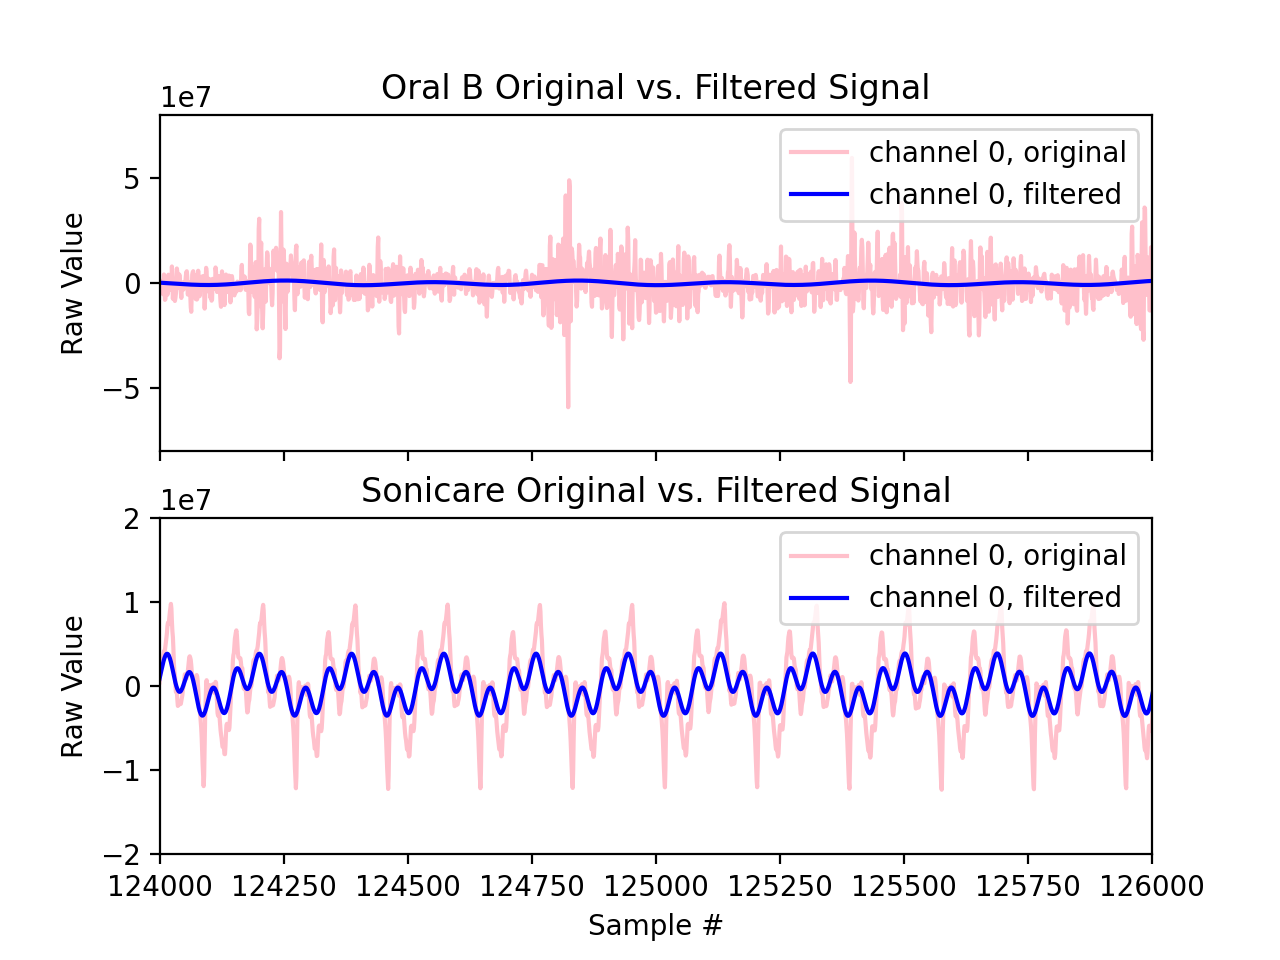

/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [184]:
fig,ax = plt.subplots(2,1, sharex = True)
ax[0].set_title('Oral B Original vs. Filtered Signal')
ax[0].set_xlim([124000,126000])
ax[0].set_ylim([-8E7,8E7])
ax[0].set_ylabel('Raw Value')
ax[0].plot(data_ob_df['channel 0'], color = 'pink',label = 'channel 0, original')
ax[0].plot(f_inv_filtered_ob_ch0, color = 'blue', label = 'channel 0, filtered')
ax[0].legend(loc = 'upper right')

ax[1].set_title('Sonicare Original vs. Filtered Signal')
ax[1].set_xlim([124000,126000])
ax[1].set_ylim([-2E7,2E7])
ax[1].set_ylabel('Raw Value')
ax[1].set_xlabel('Sample #')
ax[1].plot(data_sc_df['channel 0'], color = 'pink',label = 'channel 0, original')
ax[1].plot(f_inv_filtered_sc_ch0, color = 'blue', label = 'channel 0, filtered')
ax[1].legend(loc = 'upper right')


plt.show()

## Write back out to audio files and see how they sound!

In [190]:
wavfile.write('OralB_filtered.wav', samplerate_ob,f_inv_filtered_ob_ch0.astype(data_ob.dtype))
wavfile.write('Sonicare_filtered.wav', samplerate_sc,f_inv_filtered_sc_ch0.astype(data_sc.dtype))


/var/folders/51/gj172yh92pn1yfqvqv318v540000gn/T/ipykernel_19858/604072070.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write('OralB_filtered.wav', samplerate_ob,f_inv_filtered_ob_ch0.astype(data_ob.dtype))
/var/folders/51/gj172yh92pn1yfqvqv318v540000gn/T/ipykernel_19858/604072070.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write('Sonicare_filtered.wav', samplerate_sc,f_inv_filtered_sc_ch0.astype(data_sc.dtype))


In [191]:
IPython.display.Audio('/Users/isaacberez/Documents/Python/toothbrush_fft/OralB_filtered.wav')

In [192]:
IPython.display.Audio('/Users/isaacberez/Documents/Python/toothbrush_fft/Sonicare_filtered.wav')

## I wish my toothbrush sounded like that :) 